In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from ggplot import *
from scipy.stats import ttest_ind

In [3]:
csv_fn='/Shared/johnsonhj/HDNI/20160804_HCP_Processing_Pipeline/Stats_CSVs_old/bhattacharyya_coefs_all.csv'
DataFrame = pd.read_csv(csv_fn)

In [4]:
#myDataFrame = DataFrame
myDataFrame = DataFrame.loc[(DataFrame.method == 'TV') | (DataFrame.method == 'WTV')]

/IPLlinux/raid0/homes/aghayoor/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


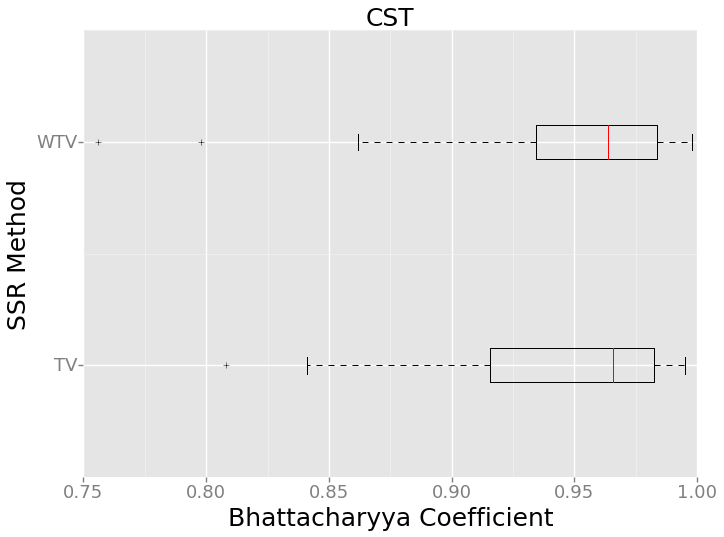

<ggplot: (295771689)>


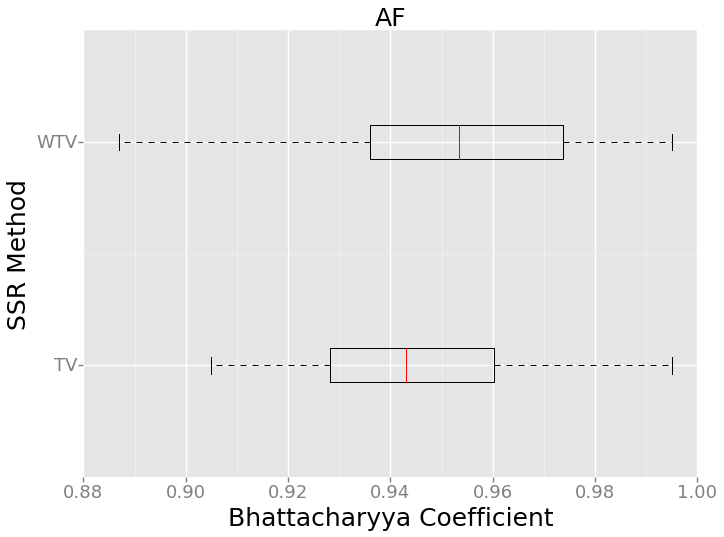

<ggplot: (296977301)>


In [5]:
df1 = myDataFrame.loc[(DataFrame.roi == 'cst_right')]
p1 = ggplot(df1, aes('Bhattacharyya_Coef', 'method')) + geom_boxplot() \
+ labs(x='Bhattacharyya Coefficient', y="SSR Method", title='CST') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p1)

# df2 = myDataFrame.loc[(DataFrame.roi == 'cst_left_top')]
# p2 = ggplot(df2, aes(x='Bhattacharyya_Coef', y='method')) + geom_boxplot() \
# + labs(x='Bhattacharyya Coefficient', y="SSR Method", title='CST (top %20)') \
# + theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
# print(p2)

df3 = myDataFrame.loc[(DataFrame.roi == 'af')]
p3 = ggplot(df3, aes(x='Bhattacharyya_Coef', y='method')) + geom_boxplot() \
+ labs(x='Bhattacharyya Coefficient', y="SSR Method", title='AF') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p3)


In [6]:
# Now try to find p values

In [7]:
# for cst

In [8]:
df_cst_wtv = DataFrame.loc[(DataFrame.roi == 'cst_right') & (DataFrame.method == 'WTV')]
cst_wtv_array = df_cst_wtv[['Bhattacharyya_Coef']].values

df_cst_tv = DataFrame.loc[(DataFrame.roi == 'cst_right') & (DataFrame.method == 'TV')]
cst_tv_array = df_cst_tv[['Bhattacharyya_Coef']].values

In [9]:
# print(cst_wtv_array)
# print('----')
# print(cst_tv_array)

In [10]:
t, p = ttest_ind(cst_wtv_array, cst_tv_array)
print(p)

[ 0.8491686]


In [11]:
# for af

In [12]:
df_af_wtv = DataFrame.loc[(DataFrame.roi == 'af') & (DataFrame.method == 'WTV')]
af_wtv_array = df_af_wtv[['Bhattacharyya_Coef']].values

df_af_tv = DataFrame.loc[(DataFrame.roi == 'af') & (DataFrame.method == 'TV')]
af_tv_array = df_af_tv[['Bhattacharyya_Coef']].values

In [13]:
# print(af_wtv_array)
# print('----')
# print(af_tv_array)

In [14]:
t, p = ttest_ind(af_wtv_array, af_tv_array)
print(p)

[ 0.47335951]


# Error Images

In [15]:
csv_fn='/Shared/johnsonhj/HDNI/20160804_HCP_Processing_Pipeline/Stats_CSVs_old/error_mean_values_all.csv'
DataFrame = pd.read_csv(csv_fn)

In [16]:
myDataFrame = DataFrame

In [17]:
# change these
errorImage='Reimann'
brainlobe='frontal'
#

In [18]:
roi1=brainlobe
roi2=brainlobe+'_pure'
roi3=brainlobe+'_NOTpure'

In [19]:
if errorImage=='FA':
    xlim1=0.02
    xlim2=0.09
elif errorImage=='Reimann':
    xlim1=0.1
    xlim2=0.35

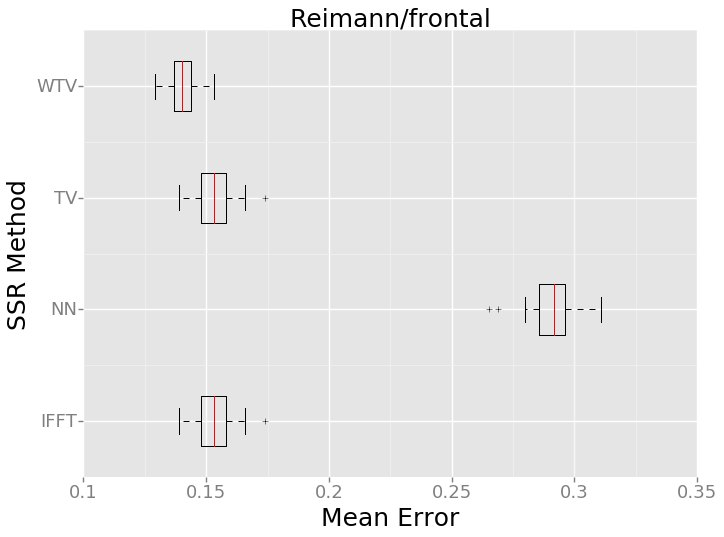

<ggplot: (296967561)>


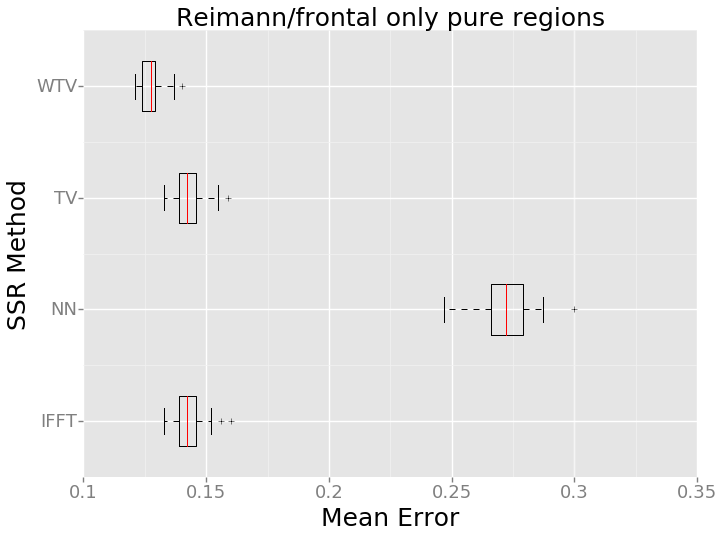

<ggplot: (275409721)>


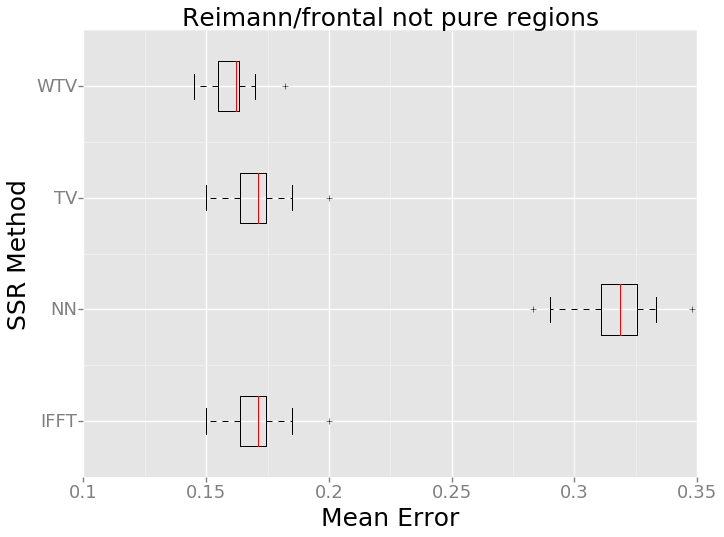

<ggplot: (296590929)>


In [20]:
fig_title=errorImage + '/' + brainlobe
df1 = myDataFrame.loc[(DataFrame.error_image == errorImage) & (DataFrame.roi == roi1)]
p1 = ggplot(df1, aes(x='error_mean_value', y='method')) + geom_boxplot() \
+ labs(x='Mean Error', y="SSR Method", title=fig_title) \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25)) \
+ xlim(xlim1, xlim2)
print(p1)



fig_title=errorImage + '/' + brainlobe + ' only pure regions'
df2 = myDataFrame.loc[(DataFrame.error_image == errorImage) & (DataFrame.roi == roi2)]
p2 = ggplot(df2, aes(x='error_mean_value', y='method')) + geom_boxplot() \
+ labs(x='Mean Error', y="SSR Method", title=fig_title) \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25)) \
+ xlim(xlim1, xlim2)
print(p2)



fig_title=errorImage + '/' + brainlobe + ' not pure regions'
df3 = myDataFrame.loc[(DataFrame.error_image == errorImage) & (DataFrame.roi == roi3)]
p3 = ggplot(df3, aes(x='error_mean_value', y='method')) + geom_boxplot() \
+ labs(x='Mean Error', y="SSR Method", title=fig_title) \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25)) \
+ xlim(xlim1, xlim2)
print(p3)

In [21]:
df1_wtv = DataFrame.loc[(DataFrame.roi == roi1) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'WTV')]
wtv_array1 = df1_wtv[['error_mean_value']].values

df1_tv = DataFrame.loc[(DataFrame.roi == roi1) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'TV')]
tv_array1 = df1_tv[['error_mean_value']].values

t, p = ttest_ind(wtv_array1, tv_array1)
print('p value for {0}: {1}'.format(roi1,p))

p value for frontal: [  4.25272713e-07]


In [22]:
df2_wtv = DataFrame.loc[(DataFrame.roi == roi2) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'WTV')]
wtv_array2 = df2_wtv[['error_mean_value']].values

df2_tv = DataFrame.loc[(DataFrame.roi == roi2) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'TV')]
tv_array2 = df2_tv[['error_mean_value']].values

t, p = ttest_ind(wtv_array2, tv_array2)
print('p value for {0}: {1}'.format(roi2,p))

p value for frontal_pure: [  2.21030513e-09]


In [23]:
df3_wtv = DataFrame.loc[(DataFrame.roi == roi3) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'WTV')]
wtv_array3 = df3_wtv[['error_mean_value']].values

df3_tv = DataFrame.loc[(DataFrame.roi == roi3) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'TV')]
tv_array3 = df3_tv[['error_mean_value']].values

t, p = ttest_ind(wtv_array3, tv_array3)
print('p value for {0}: {1}'.format(roi3,p))

p value for frontal_NOTpure: [ 0.00421561]


In [24]:
print(abs(np.mean(wtv_array1)-np.mean(tv_array1)))
print(abs(np.mean(wtv_array2)-np.mean(tv_array2)))
print(abs(np.mean(wtv_array3)-np.mean(tv_array3)))

0.0133
0.01545
0.00945


In [25]:
print(np.mean(wtv_array3))
print(np.mean(tv_array3))

0.1607
0.17015


In [26]:
# myDataFrame = DataFrame.loc[(DataFrame.roi == 'frontal') | (DataFrame.roi == 'frontal_pure') | (DataFrame.roi == 'frontal_NOTpure')]
# df1 = myDataFrame.loc[(DataFrame.error_image == 'FA')
#                      ]
# p1 = ggplot(df1, aes(x='error_mean_value', y='method', fill='roi')) + geom_boxplot() \
# + labs(x='Mean Error', y="SSR Method", title='FA/Frontal') \
# + theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
# print(p1)